In [242]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

def plot_image(img: np.array):
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap='gray')

import numpy as np
from datasets import fetch_mnist
X_train, Y_train, X_test, Y_test = fetch_mnist()

images = X_train[:10000].reshape(10000,28*28) /255
labels = Y_train[:10000]

test_images = X_test[:10000].reshape(10000,28*28) /255
test_labels = Y_test[:10000]

def one_hot(labels):
    m = (np.zeros((len(labels), len(set(labels)))))
    for l in range(len(labels)):
        m[l][labels[l]] = 1
    return m

labels = one_hot(labels)
test_labels = one_hot(test_labels)

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

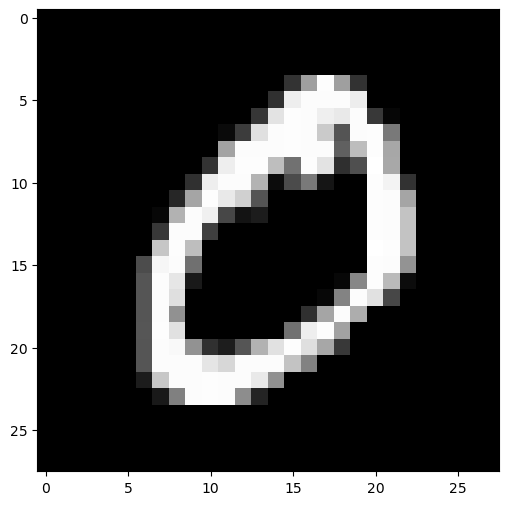

In [243]:
plot_image(images[1].reshape((28,28)))
labels[1]

In [244]:
relu = lambda x:(x>=0)*x
relu2deriv = lambda x: x>=0

X 0.4186231169612833
Y 0.43349199610327277


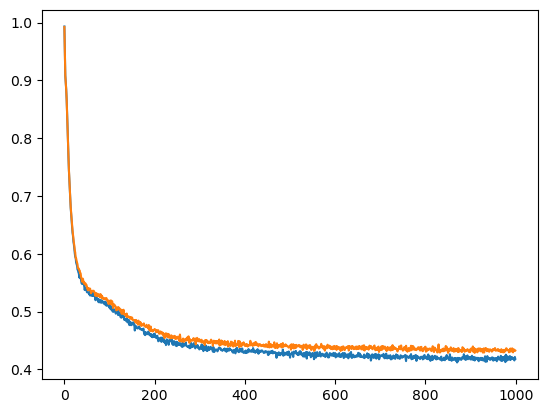

In [245]:
# define batch size
batch_size = 100

# initialize weights
weights_0_1 = 0.02*np.random.random((28*28, 50))-0.01
weights_1_2 = 0.02*np.random.random((50, 10))-0.01

x = []
y = []
for ep in range(1000):
    error_ep = 0
    test_error_ep = 0
    for batch in range(0, len(images), batch_size):

        test_batch_images = test_images[batch:batch+batch_size]
        test_batch_labels = test_labels[batch:batch+batch_size]
        # get batch data
        batch_images = images[batch:batch+batch_size]
        batch_labels = labels[batch:batch+batch_size]

        # feedforward
        layer_0 = batch_images
        layer_1 = relu(np.dot(layer_0, weights_0_1))
        drop_out_mask = np.random.randint(2, size=layer_1.shape)
        layer_1 *= drop_out_mask*2
        layer_2 = np.dot(layer_1, weights_1_2)

        # calculate error
        error = (layer_2 - batch_labels)**2/batch_size
        error_ep += np.sum(error)/batch_size

        # backpropagation
        layer_2_delta = (layer_2 - batch_labels)
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)
        layer_1_delta *= drop_out_mask

        # update weights
        weights_1_2 -= 0.01 * layer_1.T.dot(layer_2_delta) / batch_size
        weights_0_1 -= 0.01 * layer_0.T.dot(layer_1_delta) / batch_size

        #test error
        layer_0 = test_batch_images
        layer_1 = relu(np.dot(layer_0, weights_0_1))
        #drop_out_mask_test = np.random.randint(2, size=layer_1.shape)
        layer_1 *= drop_out_mask*2
        layer_2 = np.dot(layer_1, weights_1_2)

        # calculate error
        test_error = (layer_2 - test_batch_labels)**2/batch_size
        test_error_ep += np.sum(test_error)/batch_size
    
    # append error to list
    x.append(error_ep)
    y.append(test_error_ep)

# plot error over epochs
plt.plot(x)
plt.plot(y)
print("X", np.average(x[900:]))
print("Y", np.average(y[900:]))